In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')


In [3]:
df1=pd.read_csv("glass.csv")

In [4]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df1.duplicated().sum()

1

In [9]:
df1["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [10]:
x = (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
x

array([[0.43759398, 1.        , 0.25233645, ..., 0.30855019, 0.        ,
        0.        ],
       [0.47518797, 0.80178174, 0.33333333, ..., 0.22304833, 0.        ,
        0.        ],
       [0.42105263, 0.79064588, 0.3894081 , ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.54586466, 0.        , 0.53894081, ..., 0.27973978, 0.52063492,
        0.        ],
       [0.54887218, 0.        , 0.51401869, ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.52631579, 0.        , 0.5576324 , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=20)

In [15]:
model = KNeighborsClassifier(n_neighbors= 1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(pred,y_test)

0.6923076923076923

In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.82      0.64      0.72        28
           2       0.67      0.82      0.74        17
           3       0.33      0.40      0.36         5
           5       0.67      0.50      0.57         4
           6       0.60      1.00      0.75         3
           7       0.75      0.75      0.75         8

    accuracy                           0.69        65
   macro avg       0.64      0.69      0.65        65
weighted avg       0.71      0.69      0.69        65



# visualizing the CV results

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train,y_train,cv = 11)
    k_scores.append(scores.mean())
    print("k value=",k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print(classification_report(y_test,pred))

k value= 1
              precision    recall  f1-score   support

           1       0.82      0.64      0.72        28
           2       0.67      0.82      0.74        17
           3       0.33      0.40      0.36         5
           5       0.67      0.50      0.57         4
           6       0.60      1.00      0.75         3
           7       0.75      0.75      0.75         8

    accuracy                           0.69        65
   macro avg       0.64      0.69      0.65        65
weighted avg       0.71      0.69      0.69        65

k value= 3
              precision    recall  f1-score   support

           1       0.78      0.75      0.76        28
           2       0.59      0.76      0.67        17
           3       0.00      0.00      0.00         5
           5       0.50      0.50      0.50         4
           6       0.75      1.00      0.86         3
           7       0.75      0.75      0.75         8

    accuracy                           0.69        65
 

k value= 35
              precision    recall  f1-score   support

           1       0.83      0.68      0.75        28
           2       0.48      0.82      0.61        17
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.54      0.88      0.67         8

    accuracy                           0.62        65
   macro avg       0.31      0.40      0.34        65
weighted avg       0.55      0.62      0.56        65

k value= 37
              precision    recall  f1-score   support

           1       0.83      0.68      0.75        28
           2       0.48      0.82      0.61        17
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.54      0.88      0.67         8

    accuracy                           0.62        65

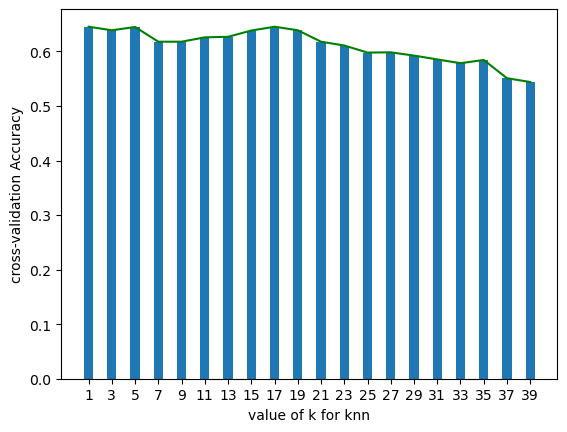

In [19]:
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores,color ="green")
plt.xlabel('value of k for knn')
plt.ylabel('cross-validation Accuracy')
plt.xticks(k_range)
plt.show()

In [20]:
np.argmax(k_scores)

0

In [21]:
k_range[0]

1

In [22]:
k_scores[1]

0.6388611388611388

In [25]:
model = KNeighborsClassifier(n_neighbors= 1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.82      0.64      0.72        28
           2       0.67      0.82      0.74        17
           3       0.33      0.40      0.36         5
           5       0.67      0.50      0.57         4
           6       0.60      1.00      0.75         3
           7       0.75      0.75      0.75         8

    accuracy                           0.69        65
   macro avg       0.64      0.69      0.65        65
weighted avg       0.71      0.69      0.69        65

